In [1]:
#include "ROOT/RDataFrame.hxx"
#include "ROOT/RVec.hxx"
#include <ROOT/RLogger.hxx>
#include "TCanvas.h"
#include "TFile.h"
#include "TH1D.h"
#include "TF1.h"
#include "TMath.h"
#include "THStack.h"
#include "TLegend.h"
#include "Math/Vector4D.h"

//cpp
#include <vector>
#include <iostream>
#include <fstream>
#include <iomanip>
#include <cstdlib>
#include <cstdio>
#include <string>
#include <Math/GenVector/LorentzVector.h>
#include <Math/GenVector/PtEtaPhiM4D.h>
#include <stdlib.h>
#include <math.h>
#include <TH1.h>

template <typename T> using Vec = ROOT::RVec<T>; 

In [2]:
std::ifstream fin("capture_translated/p-feats-from-DTH.dat");

std::vector<float>pt;
std::vector<float>eta;
std::vector<float>phi;
std::vector<int>pid;
float value;

std::string line;
std::getline(fin, line);
std::istringstream pt_line(line);
while (pt_line >> value) {
    pt.push_back(value);
}

std::getline(fin, line);
std::istringstream eta_line(line);
while (eta_line >> value) {
    eta.push_back(value);
}

std::getline(fin, line);
std::istringstream phi_line(line);
while (phi_line >> value) {
    phi.push_back(value);
}

std::getline(fin, line);
std::istringstream pid_line(line);
while (pid_line >> value) {
    pid.push_back(value);
}

fin.close();

In [3]:
std::ifstream fin2("capture_translated/p-feats-from-DTH-noseed.dat");

std::vector<float>pt_2;
std::vector<float>eta_2;
std::vector<float>phi_2;
std::vector<int>pid_2;
float value;

std::string line;
std::getline(fin2, line);
std::istringstream pt_line(line);
while (pt_line >> value) {
    pt_2.push_back(value);
}

std::getline(fin2, line);
std::istringstream eta_line(line);
while (eta_line >> value) {
    eta_2.push_back(value);
}

std::getline(fin2, line);
std::istringstream phi_line(line);
while (phi_line >> value) {
    phi_2.push_back(value);
}

std::getline(fin2, line);
std::istringstream pid_line(line);
while (pid_line >> value) {
    pid_2.push_back(value);
}


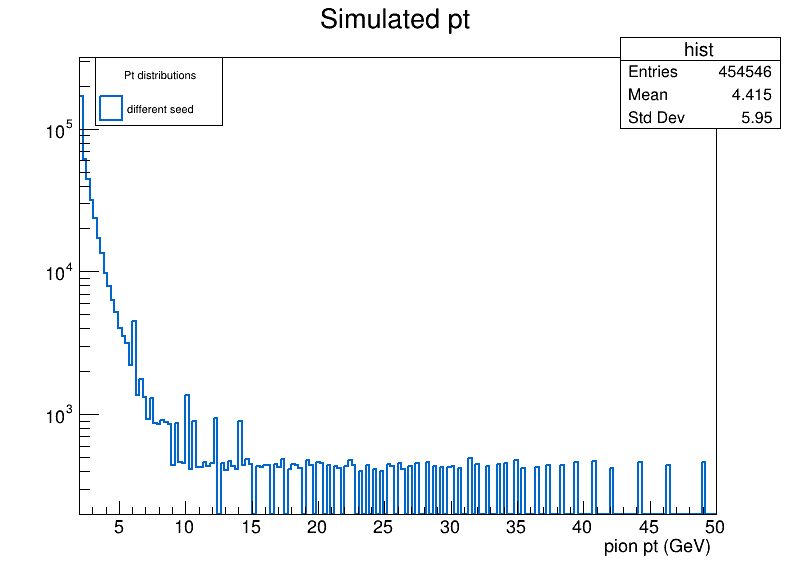

In [4]:
auto c1 = new TCanvas("c1", "c1", 800,600);

///////////// SIMULATED /////////////
TH1F* hist_genpt = new TH1F("hist", "Simulated pt; pion pt (GeV)", 180, 2, 50); //GeV
for (const auto &p : pt){
    hist_genpt->Fill(p);
}
// TH1F* hist_genpt_2 = new TH1F("hist", "Simulated pt; pion pt (GeV)", 100, 2, 50); //GeV
// for (const auto &p : pt_2){
//     hist_genpt_2->Fill(p);
// }

hist_genpt -> SetLineColor(kAzure+2);
hist_genpt -> SetLineWidth(2);
// hist_genpt_2 -> SetLineColor(kOrange+2);
// hist_genpt_2 -> SetLineWidth(2);


/////// LEGEND ///////
auto legend = new TLegend(0.12,0.78,0.28,0.9); // (x1, y1, x2, y2)
legend->SetHeader("Pt distributions", "C"); // option "C" allows to center the header
legend->AddEntry(hist_genpt, "different seed", "f");
// legend->AddEntry(hist_genpt_2, "same seed", "f");

hist_genpt->Draw();
// hist_genpt_2->Draw("same");
legend->Draw();
c1->SetLogy();
c1->Draw();

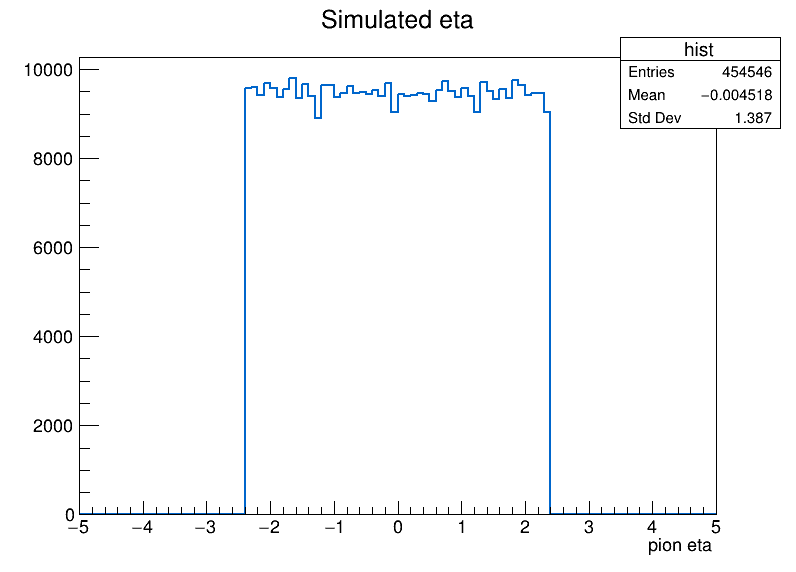

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [5]:
auto c1 = new TCanvas("c1", "c1", 800,600);

///////////// L1PUPPI /////////////
// auto L1puppi_eta   = df.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_eta").GetValue();
// std::vector<double> L1puppi_etas;
// // for (const auto& L1puppi_etai : L1puppi_eta) {
    // // // // L1puppi_etas.insert(L1puppi_etas.end(), L1puppi_etai.begin(), L1puppi_etai.end());
// }

// TH1F* hist_L1puppi = new TH1F("hist", "L1Puppi eta; pion eta", 100, -5, 5); //GeV
// for (const auto &L1eta : L1puppi_etas){
    // hist_L1puppi->Fill(L1eta);
// }

///////////// SIMULATED /////////////
TH1F* hist_geneta = new TH1F("hist", "Simulated eta; pion eta", 100, -5, 5); //GeV
for (const auto &p : eta){
    hist_geneta->Fill(p);
}

hist_geneta -> SetLineColor(kAzure+2);
hist_geneta -> SetLineWidth(2);
// hist_L1puppi -> SetLineColor(kOrange+8);
// hist_L1puppi -> SetLineWidth(2);

/////// LEGEND ///////
auto legend = new TLegend(0.1,0.7,0.35,0.9); // (x1, y1, x2, y2)
legend->SetHeader("Eta distributions", "C"); // option "C" allows to center the header
legend->AddEntry(hist_geneta, "SimPi", "f"); 
// legend->AddEntry(hist_L1puppi, "L1Puppi", "f");
legend->Draw();

// hist_L1puppi->Draw();
hist_geneta->Draw();
// gStyle->SetOptStat(0);
c1->Draw();

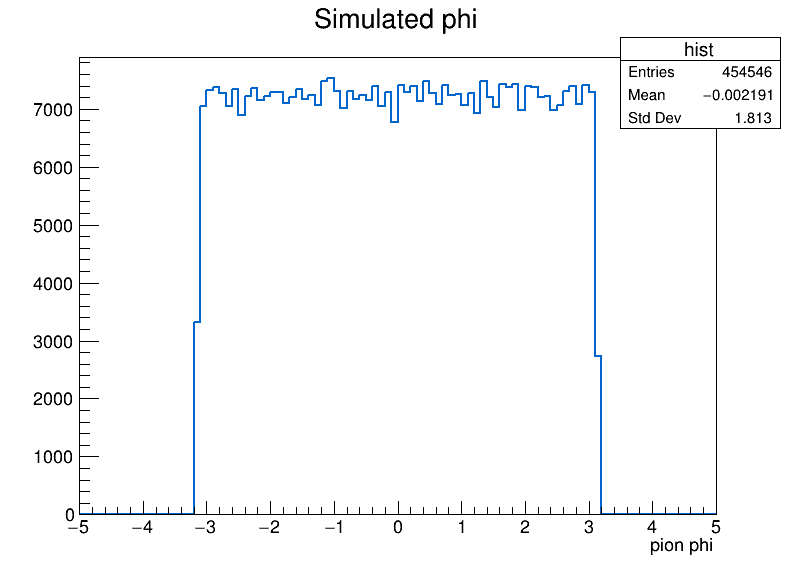

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [6]:
auto c1 = new TCanvas("c1", "c1", 800,600);

///////////// L1PUPPI /////////////

// auto L1puppi_phi   = df.Take<ROOT::VecOps::RVec<Float_t>>("L1Puppi_phi").GetValue();
// std::vector<float> L1puppi_phis;
// for (const auto& L1puppi_phii : L1puppi_phi) {
//     L1puppi_phis.insert(L1puppi_phis.end(), L1puppi_phii.begin(), L1puppi_phii.end());
// }

// TH1F* hist_L1puppi = new TH1F("hist", "L1Puppi phi; pion phi", 100, -5, 5); //GeV
// for (const auto &L1phi : L1puppi_phis){
//     hist_L1puppi->Fill(L1phi);
// }

///////////// SIMULATED /////////////
TH1F* hist_genphi = new TH1F("hist", "Simulated phi; pion phi", 100, -5, 5); //GeV
for (const auto &p : phi){
    hist_genphi->Fill(p);
}

hist_genphi -> SetLineColor(kAzure+2);
hist_genphi -> SetLineWidth(2);
// hist_L1puppi -> SetLineColor(kOrange+8);
// hist_L1puppi -> SetLineWidth(2);

/////// LEGEND ///////
auto legend = new TLegend(0.1,0.7,0.35,0.9); // (x1, y1, x2, y2)
legend->SetHeader("Eta distributions", "C"); // option "C" allows to center the header
legend->AddEntry(hist_genphi, "SimPi", "f"); 
// legend->AddEntry(hist_L1puppi, "L1Puppi", "f");
legend->Draw();

// hist_L1puppi->Draw("same");
hist_genphi->Draw();
// gStyle->SetOptStat(0);
c1->Draw();

## n distribution

In [7]:
std::ifstream input("capture_translated/n-puppi-from-DTH.dat");

std::vector<int> numbers;
int num;

while (input >> num) {
    numbers.push_back(num);
}

input.close();

In [8]:
std::ifstream input2("capture_translated/n-puppi-from-DTH-noseed.dat");

std::vector<int> numbers2;
int num;

while (input2 >> num) {
    numbers2.push_back(num);
}

input2.close();

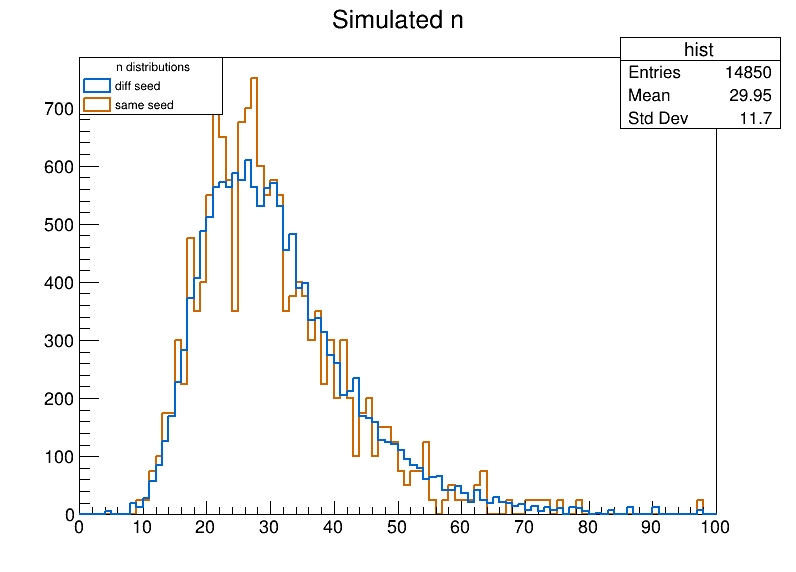

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).


In [9]:
auto c1 = new TCanvas("c1", "c1", 800,600);

TH1F* hist_n = new TH1F("hist", "Simulated n; ", 100, 0, 100); //GeV
for (const auto &n : numbers){
    hist_n->Fill(n);
}
TH1F* hist_n_2 = new TH1F("hist", "Simulated n; ", 100, 0, 100); //GeV
for (const auto &n : numbers2){
    hist_n_2->Fill(n);
}

hist_n -> SetLineColor(kAzure+2);
hist_n -> SetLineWidth(2);
hist_n_2 -> SetLineColor(kOrange+2);
hist_n_2 -> SetLineWidth(2);

/////// LEGEND ///////
auto legend = new TLegend(0.1,0.8,0.28,0.9); // (x1, y1, x2, y2)
legend->SetHeader("n distributions", "C"); // option "C" allows to center the header
legend->AddEntry(hist_n, "diff seed", "f"); 
legend->AddEntry(hist_n_2, "same seed", "f"); 

hist_n_2->Draw();
hist_n->Draw("same");
legend->Draw();
c1->Draw();

In [10]:
numbers.size()

(unsigned long) 14850
